### Grupo 12
## Entrega 2
### Predicción De La Edad del Abalon

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv('./data/abalone.csv')
columns_to_rescale = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
df[columns_to_rescale] = df[columns_to_rescale] * 200
# df.head(5)
df.shape

(4177, 9)

In [174]:
Q1 = df['Rings'].quantile(0.25)
Q3 = df['Rings'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# print(f'lower whisker: {lower_whisker}, upper whisker: {upper_whisker}')


# outliers = df[(df['Rings'] > 15.5) | (df['Rings'] < 3.5)]
# outliers.count()

# df = df[(df['Rings'] < 15.5) & (df['Rings'] > 3.5)]
# df.count()

# sns.boxplot(df, y='Rings')

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, root_mean_squared_error

X = df[['Length', 'Whole_weight']]
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_reg = LinearRegression().fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

residue = y_test - y_pred

In [176]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
scores = cross_val_score(linear_reg, X, y, cv=10)

print(f'RMSE: {rmse:.3f}')
print(f'R square score: {r2:.3f}')
print(f'model accuracy: {scores.mean():.3f}, standard deviation: {scores.std():.3f}')


RMSE: 2.606
R square score: 0.331
model accuracy: 0.094, standard deviation: 0.179


Text(0, 0.5, 'Prediction')

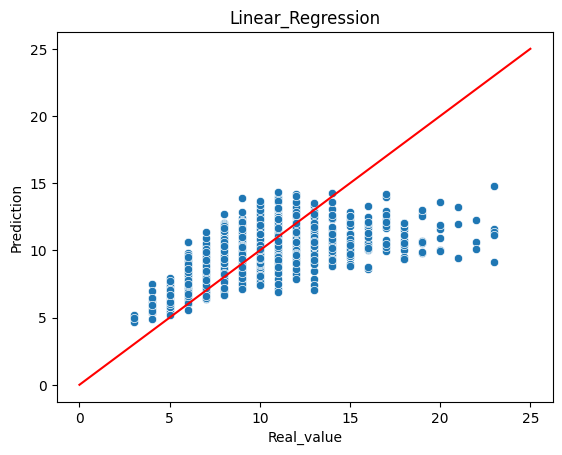

In [177]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0,25],[0,25], color='red')
plt.title('Linear_Regression')
plt.xlabel('Real_value')
plt.ylabel('Prediction')

<Axes: xlabel='Whole_weight', ylabel='Rings'>

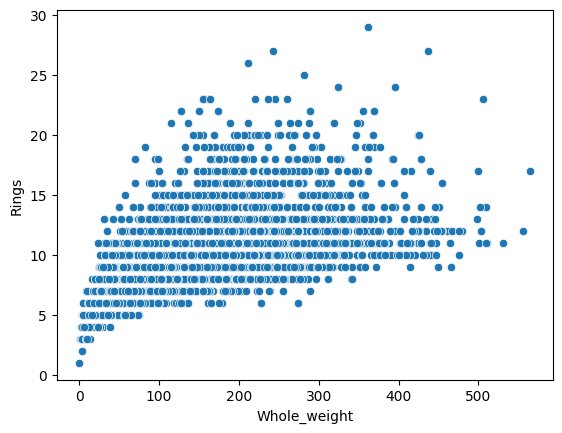

In [178]:
# sns.histplot(x=residue)
# sns.boxplot(y=df['Rings'])
sns.scatterplot(df, x='Whole_weight', y='Rings')

In [179]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, RandomForestClassifier, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
X = df[['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Height', 'Diameter']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)


bagg_reg = BaggingRegressor(estimator=LinearRegression(), n_estimators = 50, max_samples=0.8, random_state=42).fit(X_train, y_train)

# XGB_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42).fit(X_train, y_train)
v_reg = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=6)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1))
]).fit(X_train, y_train)



bagg_pred = bagg_reg.predict(X_test)
# v_reg_pred = v_reg.predict(X_test)
# XGB_pred = XGB_reg.predict(X_test)

# importances = list(v_reg.feature_importances_)
feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Features': feature_names, 'Importance': importances})


# print(feature_importance_df.sort_values(by='Importance', ascending=False))



# rmse = root_mean_squared_error(y_test, v_reg_pred)
# r2 = r2_score(y_test, v_reg_pred)
scores = cross_val_score(v_reg, X, y, cv=10)

# print(f'RMSE: {rmse:.3f}')
# print(f'R square score: {r2:.3f}')
# print(f'model accuracy: {scores.mean()}, standard deviation: {scores.std()}')

# print(X['Whole_weight'])
# print(accuracy)
# sns.heatmap(cm)

### Linear Regression (mas de dos features)

In [180]:
linear_reg = LinearRegression().fit(X_train, y_train)
lin_reg_pred = linear_reg.predict(X_test)

rmse = root_mean_squared_error(y_test, lin_reg_pred)
r2 = r2_score(y_test, lin_reg_pred)

print(f'RMSE: {rmse:.3f}')
print(f'R square score: {r2:.3f}')

RMSE: 2.195
R square score: 0.532


Text(0, 0.5, 'Prediction')

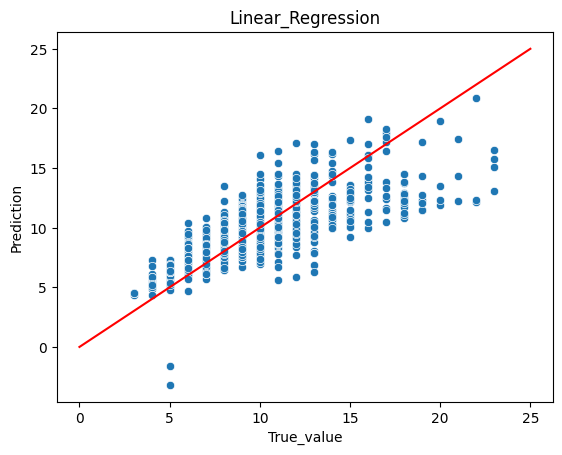

In [181]:
sns.scatterplot(x=y_test, y=lin_reg_pred)
plt.plot([0,25],[0,25], color='red')
plt.title('Linear_Regression')
plt.xlabel('True_value')
plt.ylabel('Prediction')


<Axes: xlabel='Rings', ylabel='Count'>

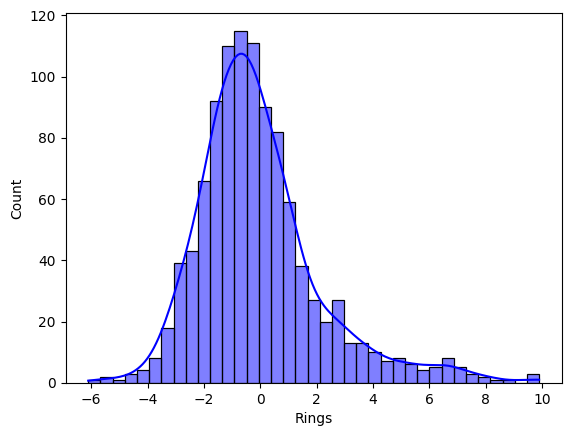

In [182]:
residue = y_test - lin_reg_pred
sns.histplot(residue, kde=True, color='blue')

### Random Forest Regressor

In [183]:
randfor_reg = RandomForestRegressor(n_estimators=100, max_depth=3, max_samples=10, bootstrap=True, random_state=42).fit(X_train, y_train)
randfor_pred = randfor_reg.predict(X_test)

importances = list(randfor_reg.feature_importances_)
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Features': feature_names, 'Importance': importances})
scores = cross_val_score(randfor_reg, X, y, cv=10)
rmse = root_mean_squared_error(y_test, randfor_pred)
r2 = r2_score(y_test, randfor_pred)

print(feature_importance_df.sort_values(by='Importance', ascending=False))
print(f'model accuracy: {scores.mean()}, standard deviation: {scores.std()}')

print(f'RMSE: {rmse:.3f}')
print(f'R square score: {r2:.3f}')

         Features  Importance
3    Shell_weight    0.245771
4          Height    0.176544
0    Whole_weight    0.151931
5        Diameter    0.151514
2  Viscera_weight    0.141919
1  Shucked_weight    0.132320
model accuracy: 0.19475026364073203, standard deviation: 0.1570035314411657
RMSE: 2.487
R square score: 0.399


Text(0, 0.5, 'Prediction')

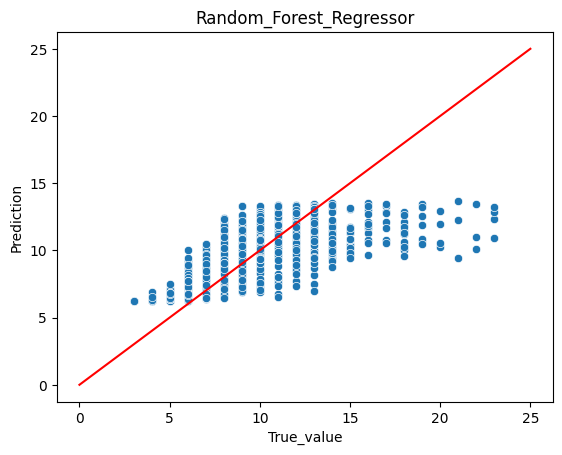

In [184]:
sns.scatterplot(x=y_test, y=randfor_pred)
plt.plot([0,25],[0,25], color='red')
plt.title('Random_Forest_Regressor')
plt.xlabel('True_value')
plt.ylabel('Prediction')